# Worksheet 19

Name:  Haocheng Liu
UID: U06776662

### Topics

- Linear Model Evaluation

## Linear Model Evaluation

Notice that R^2 only increases with the number of explanatory variables used. Hence the need for an adjusted R^2 that penalizes for insignificant explanatory variables.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))

0.9953641374726012
0.995367320801245
0.995372116926365
0.9954456130459035
0.9954665196278364
0.9954795773679191
0.9955962946962539
0.9958168354768892
0.9958584469886693
0.9958585143336802
0.9958846059927835
0.9958889890662788
0.9958909364095846
0.9958575618634048


a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.3125
[1, 1, 1, 0, 0]
0.31249999999999994


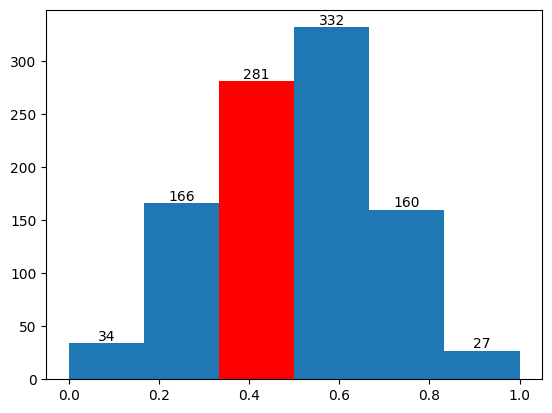

In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

def num_successes(flips):
    return sum(flips)

print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 5
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

b) Plot a data set and fitted line through the point when there is no relationship between X and y.

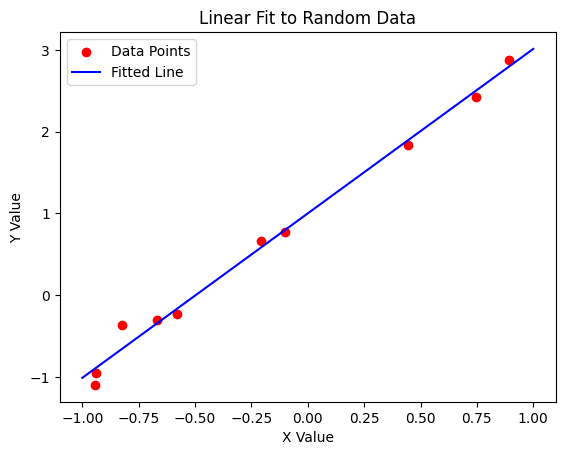

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sample size for the dataset
SAMPLE_SIZE = 10

# Generate random x values
x_values = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)  # x values are in the range [-1, 1]

# Generate corresponding y values with some noise
noise = np.random.normal(0, 0.1, SAMPLE_SIZE)  # Gaussian noise
slope = 2.0  # example slope
intercept = 1.0  # example intercept
y_values = slope * x_values + intercept + noise  # y = mx + c + noise

# Fit a linear regression model
from sklearn.linear_model import LinearRegression

# Reshaping x_values for it to be a 2D array
X = x_values.reshape(-1, 1)
Y = y_values.reshape(-1, 1)

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Get the slope and intercept of the fitted line
fitted_slope = model.coef_[0][0]
fitted_intercept = model.intercept_[0]

# Create a series of x values for the fitted line plot
x_fit = np.linspace(-1, 1, 100)
# Calculate the y values based on the slope and intercept
y_fit = fitted_slope * x_fit + fitted_intercept

# Plot the original data points
plt.scatter(x_values, y_values, color='red', label='Data Points')

# Plot the fitted line
plt.plot(x_fit, y_fit, color='blue', label='Fitted Line')

# Add title and labels
plt.title('Linear Fit to Random Data')
plt.xlabel('X Value')
plt.ylabel('Y Value')

# Show legend
plt.legend()

# Show the plot
plt.show()

c) Using the above code, plot a histogram of the parameter estimates for the slope after generating `1000` independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

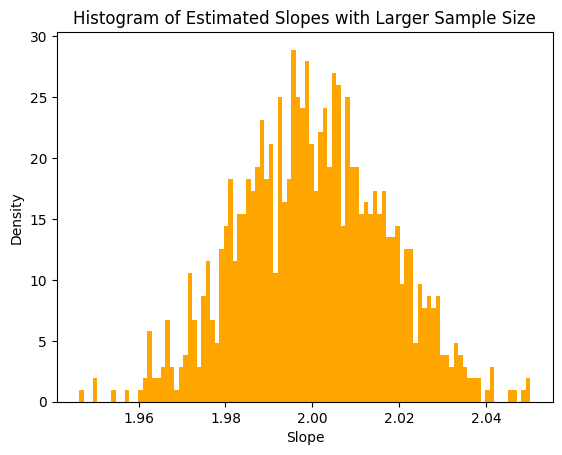

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Initialize the list to store the slope estimates
beta_hist_large = []

# Define the number of datasets and the larger sample size for each dataset
num_datasets = 1000
sample_size_large = 100  # Increased sample size

for _ in range(num_datasets):
    # Generate random x values for the larger sample size
    x_values_large = -1.0 + 2.0 * np.random.random(sample_size_large)
    # Generate corresponding y values with some noise for the larger sample size
    noise_large = np.random.normal(0, 0.1, sample_size_large)
    true_slope = 2.0  # The true slope used for generating the data
    true_intercept = 1.0  # The true intercept
    y_values_large = true_slope * x_values_large + true_intercept + noise_large

    # Reshape the x_values for sklearn
    X_large = x_values_large.reshape(-1, 1)
    Y_large = y_values_large.reshape(-1, 1)

    # Create and fit the model
    model_large = LinearRegression()
    model_large.fit(X_large, Y_large)

    # Store the estimated slope (coefficient) in the list
    beta_hist_large.append(model_large.coef_[0][0])

# Plot the histogram of the estimated slopes for the larger sample size
fig, ax = plt.subplots()
ax.hist(beta_hist_large, bins=100, density=True, color='orange')
ax.set_title('Histogram of Estimated Slopes with Larger Sample Size')
ax.set_xlabel('Slope')
ax.set_ylabel('Density')
plt.show()


d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

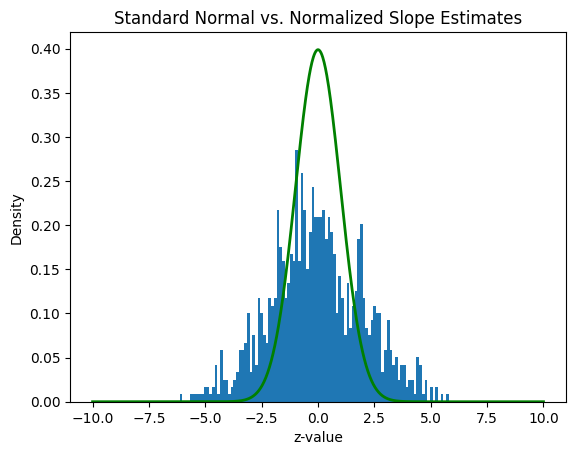

In [6]:
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Initialize the list to store the z-values
z_values = []

# Define the number of simulations, true parameters, and sample size
num_simulations = 1000
true_slope = 2.0
true_intercept = 1.0
sample_size = 100
sigma = 1  # Assuming the standard deviation of the noise is 1

for _ in range(num_simulations):
    # Generate random x values
    x = np.random.rand(sample_size)
    # Generate corresponding y values with Gaussian noise
    y = true_slope * x + true_intercept + np.random.normal(0, sigma, sample_size)
    
    # Reshape x for sklearn
    X = x.reshape(-1, 1)
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Calculate the residuals
    residuals = y - model.predict(X)
    # Estimate the variance of the error term
    residual_variance = np.var(residuals, ddof=1)
    
    # Calculate the standard error of the estimated slope
    XTX_inv = np.linalg.inv(X.T @ X)
    Skk = XTX_inv[0][0]  # Only one predictor, hence XTX_inv is 1x1
    se_slope = np.sqrt(residual_variance * Skk)
    
    # Calculate the z-value for the slope
    z_slope = (model.coef_[0] - true_slope) / se_slope
    z_values.append(z_slope)

# Define the range of x values for the normal pdf
xs = np.linspace(-10, 10, 1000)

# Create histogram of the z-values
fig, ax = plt.subplots()
ax.hist(z_values, bins=100, density=True)

# Plot the standard normal pdf
ax.plot(xs, norm.pdf(xs), color='green', lw=2)

# Set the title and labels
ax.set_title('Standard Normal vs. Normalized Slope Estimates')
ax.set_xlabel('z-value')
ax.set_ylabel('Density')

# Show the plot
plt.show()

e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

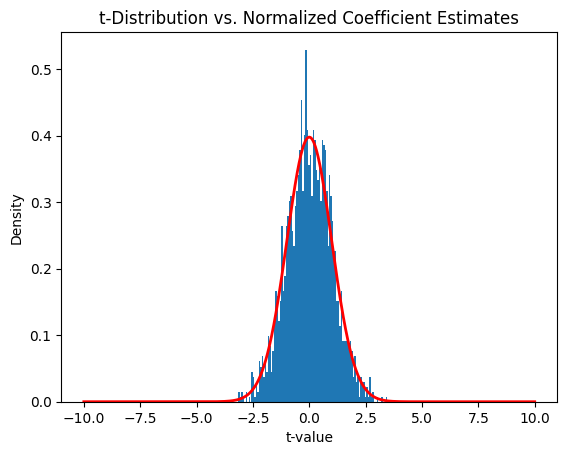

In [7]:
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the function to calculate the standard error of the regression coefficients
def standard_error(X, residuals, p):
    # Residual Sum of Squares (RSS)
    RSS = np.sum(residuals**2)
    # Degrees of freedom
    df = len(X) - p
    # Standard error
    return np.sqrt(RSS / df)

# Initialize the list to store t-values
t_values = []

# Define the number of simulations, true parameters, and sample size
num_simulations = 1000
true_slope = 2.0
true_intercept = 1.0
sample_size = 100
p = 2  # number of parameters (slope and intercept)

for _ in range(num_simulations):
    # Generate random x values
    x = np.random.rand(sample_size)
    # Generate corresponding y values with Gaussian noise
    y = true_slope * x + true_intercept + np.random.normal(0, 1, sample_size)
    
    # Reshape x for sklearn
    X = np.column_stack((np.ones(sample_size), x))  # Add intercept term
    
    # Fit the linear regression model
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)
    
    # Calculate the residuals
    residuals = y - model.predict(X)
    
    # Calculate standard errors
    se = standard_error(X, residuals, p)
    
    # Calculate t-values for slope and intercept
    t_slope = (model.coef_[1] - true_slope) / (se * np.sqrt(np.linalg.inv(X.T @ X)[1, 1]))
    t_intercept = (model.coef_[0] - true_intercept) / (se * np.sqrt(np.linalg.inv(X.T @ X)[0, 0]))
    
    # Append t-values to the list
    t_values.append(t_slope)
    t_values.append(t_intercept)

# Create histogram of the t-values
fig, ax = plt.subplots()
ax.hist(t_values, bins=100, density=True)

# Plot the t-distribution pdf
df = sample_size - p  # Degrees of freedom
xs = np.linspace(-10, 10, 1000)
ax.plot(xs, t.pdf(xs, df), color='red', lw=2)

# Set the title and labels
ax.set_title('t-Distribution vs. Normalized Coefficient Estimates')
ax.set_xlabel('t-value')
ax.set_ylabel('Density')

# Show the plot
plt.show()

f) You are given the following dataset:

[-0.31759557  0.13222591]


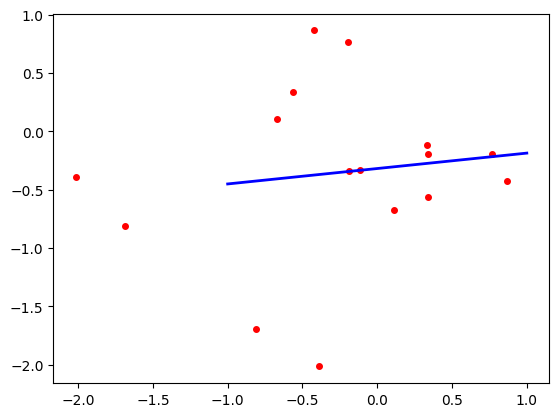

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Given dataset
x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, 
              -0.42403586, -0.8114285, -0.389869, 0.34096108, 0.33409286, 
              0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, 
              -2.01463592])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 
              0.86592388, -1.68912015, -2.01463592, -0.1920605, -0.11290798, 
              -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, 
              -0.389869])

# Computing the coefficients
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_hat)

# Create a range of x values for plotting the fitted line
xplot = np.linspace(-1, 1, 100)
# Calculate the y values of the fitted line
yestplot = beta_hat[0] + beta_hat[1] * xplot

# Plot the original data points
plt.plot(x, y, 'ro', markersize=4)

# Plot the fitted line
plt.plot(xplot, yestplot, 'b-', lw=2)

# Display the plot
plt.show()

what is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$ ?

In [9]:
from scipy.stats import t
import numpy as np

# Assuming this is a continuation from the previous dataset and calculations
# We now need to calculate the t-statistic for the slope and find the
# probability of observing a t-statistic as extreme as this under the null
# hypothesis that the true slope beta is 0.

# Given data from the previous code snippet
x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, 
              -0.42403586, -0.8114285, -0.389869, 0.34096108, 0.33409286, 
              0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, 
              -2.01463592])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 
              0.86592388, -1.68912015, -2.01463592, -0.1920605, -0.11290798, 
              -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, 
              -0.389869])
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T

# Calculate beta_hat using the normal equation
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Calculate residuals
residuals = y - (X @ beta_hat)

# Calculate the standard error of the slope estimate
n = len(y)  # Number of observations
p = 2  # Number of parameters (slope and intercept)
RSS = np.sum(residuals**2)  # Residual Sum of Squares
sigma_squared_hat = RSS / (n - p)
XTX_inv = np.linalg.inv(X.T @ X)
se_slope = np.sqrt(sigma_squared_hat * XTX_inv[1, 1])

# Calculate the t-statistic for the slope
t_stat_slope = beta_hat[1] / se_slope

# Calculate the two-tailed p-value for the t-statistic
p_value = 2 * t.sf(np.abs(t_stat_slope), n - p)

print(f"Slope Estimate: {beta_hat[1]}")
print(f"Standard Error of Slope: {se_slope}")
print(f"t-statistic for the slope: {t_stat_slope}")
print(f"p-value for the slope: {p_value}")



Slope Estimate: 0.13222591234483277
Standard Error of Slope: 0.25244424529454584
t-statistic for the slope: 0.5237826364017717
p-value for the slope: 0.6086221905469924
